# Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Pip Install

In [3]:
!pip install pdf2image

# Import

In [4]:
from pdf2image import convert_from_path

In [5]:
# Install poppler-utils
!apt install poppler-utils

# Verify installation
!which poppler

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


# Pre processing

In [6]:
# Function to rotate and crop images to (1500, 2000)
def process_image(image):
    width, height = image.size
    target_size = (1500, 2000)

    if width != target_size[0] or height != target_size[1]:
        # If the image is not already the target size, rotate if necessary and then crop
        if width > height:
            image = image.rotate(90, expand=True)

        # After rotation, ensure the image is at least the target size
        width, height = image.size
        left = (width - target_size[0]) / 2
        top = (height - target_size[1]) / 2
        right = (width + target_size[0]) / 2
        bottom = (height + target_size[1]) / 2

        image = image.crop((left, top, right, bottom))

    return image

#Load TRP Image

```
# This is formatted as code
```



In [7]:
pdf_path = '/content/drive/MyDrive/Material/TRP.pdf'
TRPimages = convert_from_path(pdf_path)

In [8]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# for i, image in enumerate(images):
#     display(Image.fromarray(image))
# for image in TRPimages:
#   display(image)

In [9]:
TRPimages = [process_image(image) for image in TRPimages]


In [10]:
for image in TRPimages:
  print(image.size)

(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)


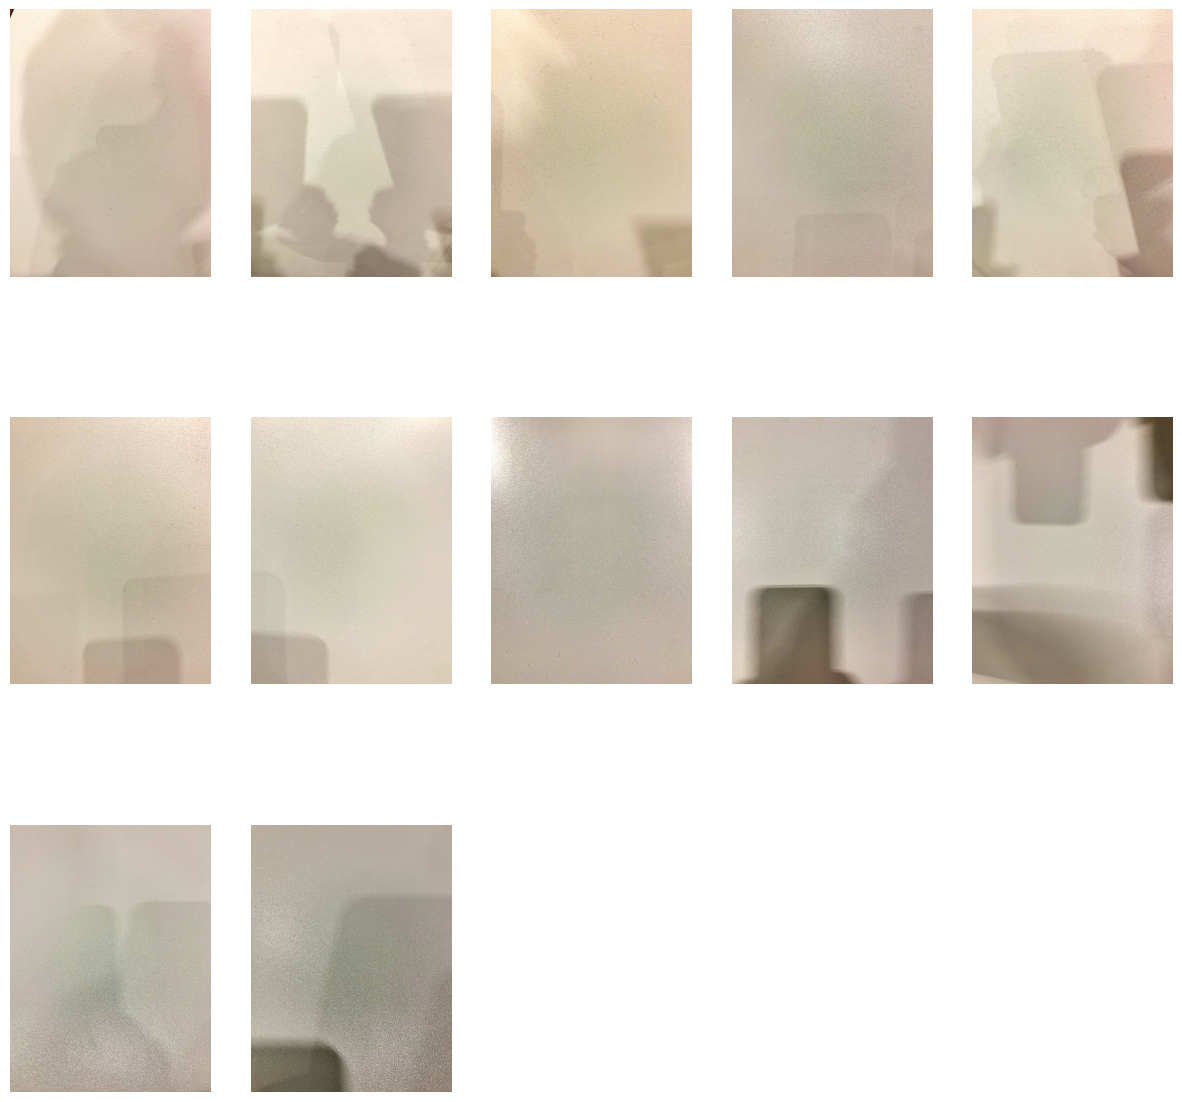

In [11]:
# Define the number of columns for the grid
columns = 5
# Calculate the number of rows needed
rows = (len(TRPimages) + columns - 1) // columns

# Create a figure to hold the subplots
fig = plt.figure(figsize=(15, 15))
# Loop through each image and add it to the grid
for i, image in enumerate(TRPimages):
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.imshow(image)
    ax.axis('off')

# Display the figure
plt.show()

#Load ABS Melamine Image


In [12]:
pdf_path = '/content/drive/MyDrive/Material/ABSMELAMINE.pdf'
ABSimages = convert_from_path(pdf_path)

In [13]:
ABSimages = [process_image(image) for image in ABSimages]


In [14]:
for image in ABSimages:
  print(image.size)

(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)
(1500, 2000)


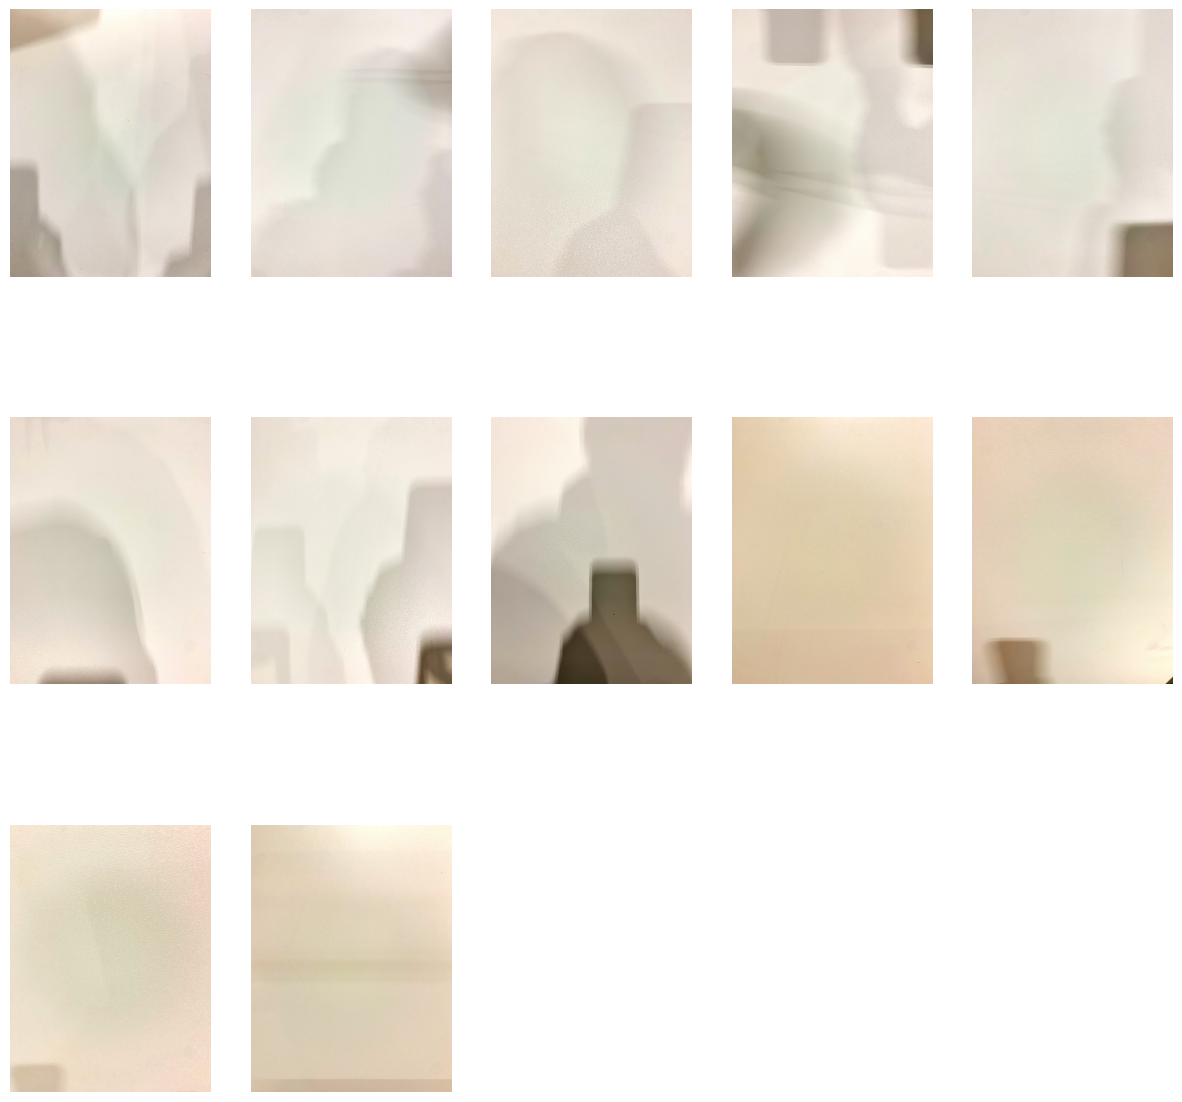

In [15]:
# Define the number of columns for the grid
columns = 5
# Calculate the number of rows needed
rows = (len(ABSimages) + columns - 1) // columns

# Create a figure to hold the subplots
fig = plt.figure(figsize=(15, 15))
# Loop through each image and add it to the grid
for i, image in enumerate(ABSimages):
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.imshow(image)
    ax.axis('off')

# Display the figure
plt.show()

# DataSet

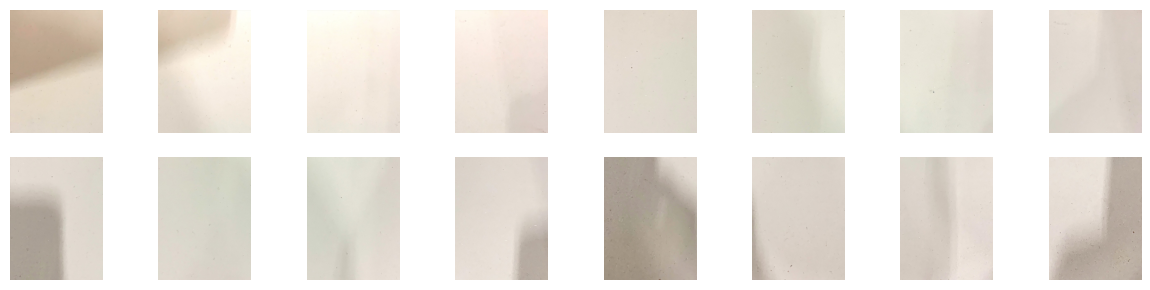

In [16]:
from PIL import Image
import numpy as np

# Define the patch size
patch_size = (1500//4,2000//4)

def split_image_into_patches(image, patch_size):
    patches = []
    for i in range(0, image.size[1], patch_size[1]):
        for j in range(0, image.size[0], patch_size[0]):
            box = (j, i, j + patch_size[0], i + patch_size[1])
            patch = image.crop(box)
            patches.append(patch)
    return patches

# Example arrays of images from two classes
# ABSimages = [Image.open(path) for path in ABSimage_paths]
# TRPimages = [Image.open(path) for path in TRPimage_paths]

# Create patches and labels
ABS_patches = []
TRP_patches = []

for image in ABSimages:
    patches = split_image_into_patches(image, patch_size)
    ABS_patches.extend(patches)

for image in TRPimages:
    patches = split_image_into_patches(image, patch_size)
    TRP_patches.extend(patches)

# Create labels
ABS_labels = [0] * len(ABS_patches)  # Label 0 for ABSimages patches
TRP_labels = [1] * len(TRP_patches)  # Label 1 for TRPimages patches

# Combine patches and labels into a dataset
dataset = ABS_patches + TRP_patches
labels = ABS_labels + TRP_labels

# Display some patches
import matplotlib.pyplot as plt

columns = 8
rows = 8
fig = plt.figure(figsize=(15, 15))

for i, patch in enumerate(dataset[:16]):  # Display the first 64 patches
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.imshow(patch)
    ax.axis('off')

plt.show()

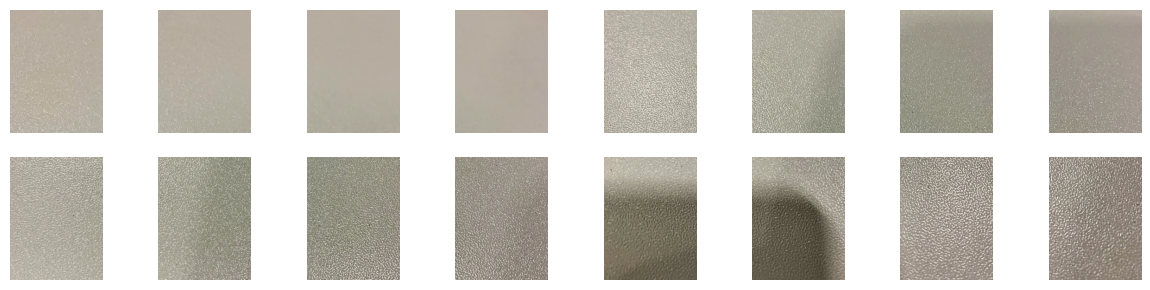

In [17]:
columns = 8
rows = 8
fig = plt.figure(figsize=(15, 15))

for i, patch in enumerate(dataset[-16:]):  # Display the first 64 patches
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.imshow(patch)
    ax.axis('off')

plt.show()

In [18]:
import os
from PIL import Image
import numpy as np

# Example ABS_patches array
# ABS_patches = ...

# Define the directory to save images
save_dir = '/content/drive/MyDrive/Material/Dataset/ABS-MELAMINE'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Function to save images
def save_images(image_array, save_dir, prefix='image'):
    for i, img in enumerate(image_array):


        # Save the image
        img.save(os.path.join(save_dir, f'{prefix}_{i}.png'))

# Save ABS_patches images
save_images(ABS_patches, save_dir, prefix='ABS')

print(f'Images saved in {save_dir}')


Images saved in /content/drive/MyDrive/Material/Dataset/ABS-MELAMINE


In [19]:
# Define the directory to save images
save_dir = '/content/drive/MyDrive/Material/Dataset/TRP'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
# Save ABS_patches images
save_images(TRP_patches, save_dir, prefix='TRP')

print(f'Images saved in {save_dir}')

Images saved in /content/drive/MyDrive/Material/Dataset/TRP


In [20]:
from sklearn.model_selection import train_test_split
# Reshape patches for AlexNet (if channels are missing, add them)
# For grayscale images, you'd use (4, 4, 1), for RGB use (4, 4, 3)
# dataset_np  = [np.array(image) for image in dataset]

# X_reshaped = dataset_np.reshape(-1, 4, 4, 3)  # Assuming RGB images
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

In [21]:
len(X_train)

268

In [22]:
len(dataset)

384

In [23]:
len(X_test)

116

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
X_train.shape

(268, 500, 375, 3)

In [26]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [27]:
# from tensorflow.keras.utils import to_categorical

# # Assuming 2 classes (0 and 1), otherwise adjust the number of classes
# y_train = to_categorical(y_train, num_classes=2)
# y_test = to_categorical(y_test, num_classes=2)

In [28]:
y_train

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

# AlexNet

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_alexnet_model(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(256, (5, 5), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(2, activation='softmax')(x)  # Assuming 2 classes

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Example usage
input_shape = (500, 375, 3)
model = create_alexnet_model(input_shape)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500, 375, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 123, 92, 96)         │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 61, 45, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 45, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 22, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 22, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 22, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 35840)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     146,804,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,341,442 (638.36 MB)

 Trainable params: 167,341,442 (638.36 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# def create_alexnet_model(input_shape):
#     model = Sequential([
#         Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
#         MaxPooling2D((3, 3), strides=(2, 2)),
#         Conv2D(256, (5, 5), padding='same', activation='relu'),
#         MaxPooling2D((3, 3), strides=(2, 2)),
#         Conv2D(384, (3, 3), padding='same', activation='relu'),
#         Conv2D(384, (3, 3), padding='same', activation='relu'),
#         Conv2D(256, (3, 3), padding='same', activation='relu'),
#         MaxPooling2D((3, 3), strides=(2, 2)),
#         Flatten(),
#         Dense(4096, activation='relu'),
#         Dropout(0.5),
#         Dense(4096, activation='relu'),
#         Dropout(0.5),
#         Dense(2, activation='softmax')  # Assuming 2 classes
#     ])
#     return model

# model = create_alexnet_model((500, 375, 3))


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 156s 21s/step - accuracy: 0.5080 - loss: 9.8848 - val_accuracy: 0.6111 - val_loss: 0.6925
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 204s 22s/step - accuracy: 0.5009 - loss: 0.9133 - val_accuracy: 0.4815 - val_loss: 0.7034
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 199s 21s/step - accuracy: 0.5263 - loss: 0.7143 - val_accuracy: 0.4815 - val_loss: 0.6959
Epoch 4/10
2/7 ━━━━━━━━━━━━━━━━━━━━ 1:38 20s/step - accuracy: 0.4922 - loss: 0.6972

In [ ]:
# model.save('/content/drive/MyDrive/Material/Model/alexNet')
model.save('/content/drive/MyDrive/Material/Model/alexNet.h5')

In [ ]:
# !pip install tensorflowjs

In [ ]:
!cd /content/drive/MyDrive/Material/Model/
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /content/drive/MyDrive/Material/Model/alexNet.h5 /content/drive/MyDrive/Material/Model/tfjs_alexnet_model

In [ ]:
!zip -r /content/drive/MyDrive/Material/Model/tfjs_alexnet_model/modeldata.zip /content/drive/MyDrive/Material/Model/tfjs_alexnet_model

In [ ]:
# !tensorflowjs_converter --input_format=keras /content/drive/MyDrive/Material/Model/alexNet.h5 /content/drive/MyDrive/Material/Model/tfjs_alexnet_keras_model

In [ ]:
# !zip -r /content/drive/MyDrive/Material/Model/tfjs_alexnet_keras_model/modeldata.zip /content/drive/MyDrive/Material/Model/tfjs_alexnet_keras_model